# Поиск минимума

Подмодуль [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) содержит в себе множество методов для решения задач оптимизации (минимизация, максимизация).

In [1]:
from matplotlib import pyplot as plt


def configure_matplotlib():
    plt.rc('text', usetex=True)
    plt.rcParams["axes.titlesize"] = 28
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 24
    plt.rcParams["xtick.labelsize"] = plt.rcParams["ytick.labelsize"] = 18
    plt.rcParams["text.latex.preamble"] = r"""
    \usepackage[utf8]{inputenc}
    \usepackage[english,russian]{babel}
    \usepackage{amsmath}
    """

configure_matplotlib()

## Минимизация скалярной функции одного аргумента

Функция [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) ищет минимум функции $f\colon \mathbb{R} \to \mathbb{R}$ при независимой переменной в области $D\subset\mathbb{R}$, т.е. решает задачу

$$
f(x) \sim \min_{x \in D},
$$

иными словами задачу поиска $x^*\in\mathbb{R}$, такого что

$$
f(x^*) = \min\limits_{x\in D} f(x).
$$

     fun: -9.914949590828147
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458


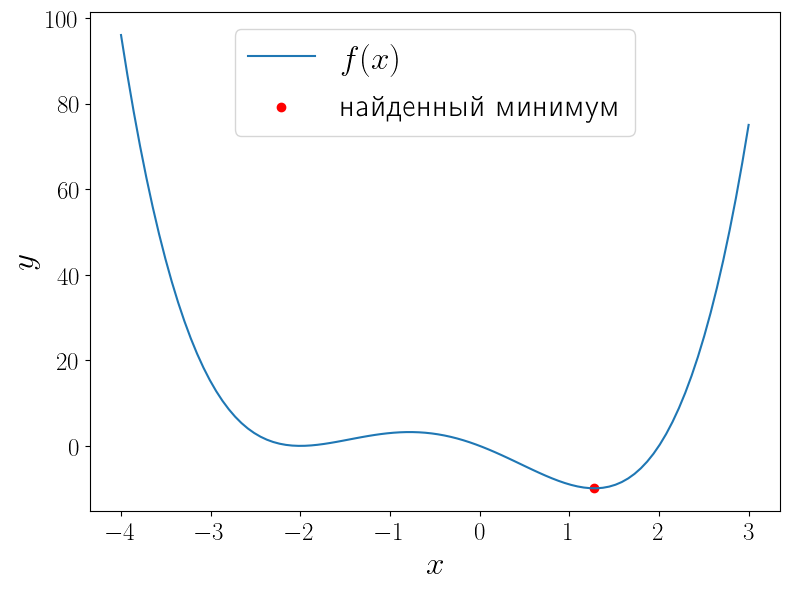

In [2]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


def f(x):
    return (x - 2) * x * (x + 2)**2


solution = optimize.minimize_scalar(f)
print(solution)


x = np.linspace(-4, 3, 100)

fig, ax = plt.subplots(figsize=(8, 6), layout="tight")
ax.plot(x, f(x), label=r"$f(x)$")
ax.scatter(solution.x, solution.fun, color="red", label="найденный минимум")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

У функции $f(x) = (x - 1)x(x + 2)^2$ два локальных минимума и функция `minimize_scalar` вернула из них глобальный. Можно сузить поиск область поиска минимума используя метод `bounded`.

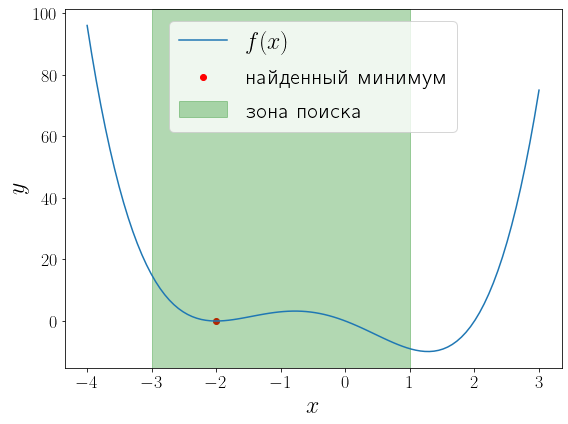

In [6]:
a, b = -3, 1
solution = optimize.minimize_scalar(f, bounds=(a, b), method="bounded")

fig, ax = plt.subplots(figsize=(8, 6), layout="tight")
ax.plot(x, f(x), label="$f(x)$")
ax.scatter(solution.x, solution.fun, color="red", label="найденный минимум")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.axvspan(a, b, color="green", alpha=0.3, label="зона поиска")
ax.legend()

## Минимизация функции многих переменных

### Общий случай

Функция [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) предназначена для минимизации функции многих переменных $f\colon\mathbb{R}^n\to\mathbb{R}$ при независимой переменной в области $D\subset\mathbb{R}^n$: 

$$
f(\vec{x}) \sim \min_{\vec{x}\in D}.
$$

При этом важно определить минимизируемую функцию именно принимающей один векторный аргумент, а не $n$ скалярных. 

В качестве примера рассмотрим поиск минимума [функции Розенброка](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A0%D0%BE%D0%B7%D0%B5%D0%BD%D0%B1%D1%80%D0%BE%D0%BA%D0%B0)

$$
f(\alpha, \beta) = (1 - \alpha)^2 + 100(\beta - \alpha^2)^2.
$$

Её минимум равен 0, который достигается при $\alpha = \beta = 1$. Для минимизации функции средствами `SciPy` необходимо определить её в виде функции одного векторного аргумента. Например, если положить, что $\vec{x}=\begin{pmatrix}x_1 \\ x_2\end{pmatrix}=\begin{pmatrix}\alpha \\ \beta\end{pmatrix}$, то функцию Розенброка можно записать в виде 

$$
f(\vec{x}) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2.
$$

Именно в таком виде она уже определена в `SciPy`: [rosen](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen.html). Кроме того в `SciPy` доступны её градиент [rosen_der](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen_der.html) и матрица Гессе [rosen_hess](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.rosen_hess.html). В ячейке ниже строится график этой функции.


<AxesSubplot:xlabel='$x$', ylabel='$y$'>

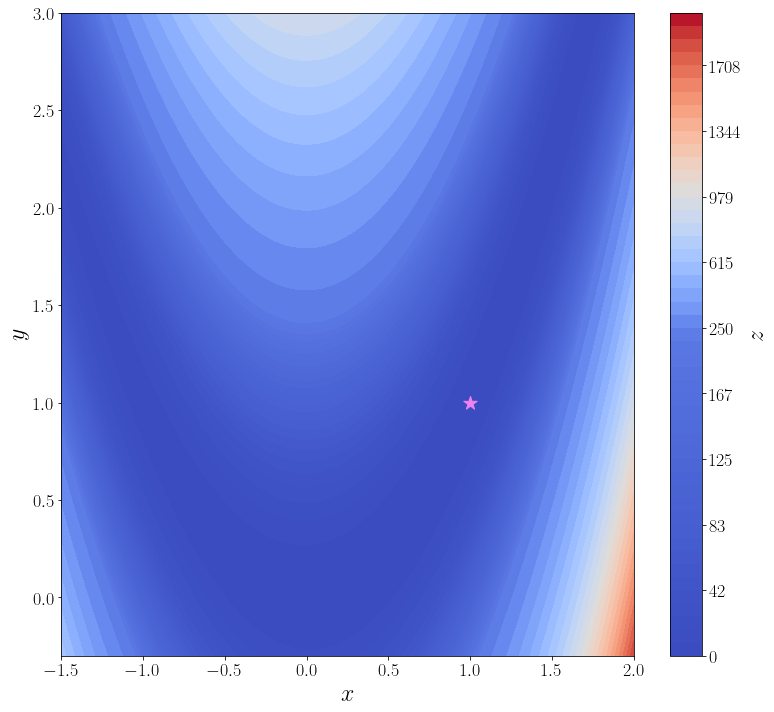

In [31]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


f = optimize.rosen


def plot_surface():
    n_points = 100
    x = np.linspace(-1.5, 2.0, n_points)
    y = np.linspace(-0.3, 3, n_points)
    xx, yy = np.meshgrid(x, y)
    X = np.vstack([xx.flatten(), yy.flatten()])
    zz = f(X).reshape(n_points, n_points)
    
    levels = np.hstack([np.linspace(0, 200, 25), np.linspace(250, 2000, 25)])
    
    fig, ax = plt.subplots(figsize=(11, 10), layout="tight")
    cf = ax.contourf(xx, yy, zz, levels=levels, cmap="coolwarm")
    cbar = fig.colorbar(cf)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    cbar.set_label("$z$")
    ax.scatter([1], [1], marker="*", s=200, color="violet", label="глобальный минимум")
    return ax

plot_surface()

В самой простой своей форме достаточно передать методу [optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) минимизируемую функцию $f$ и начальное приближение $x_0$.

      fun: 2.0042284826789698e-11
 hess_inv: array([[0.49906269, 0.99813029],
       [0.99813029, 2.00126989]])
      jac: array([-2.75307058e-08,  1.52773794e-08])
  message: 'Optimization terminated successfully.'
     nfev: 168
      nit: 42
     njev: 56
   status: 0
  success: True
        x: array([0.99999552, 0.99999104])


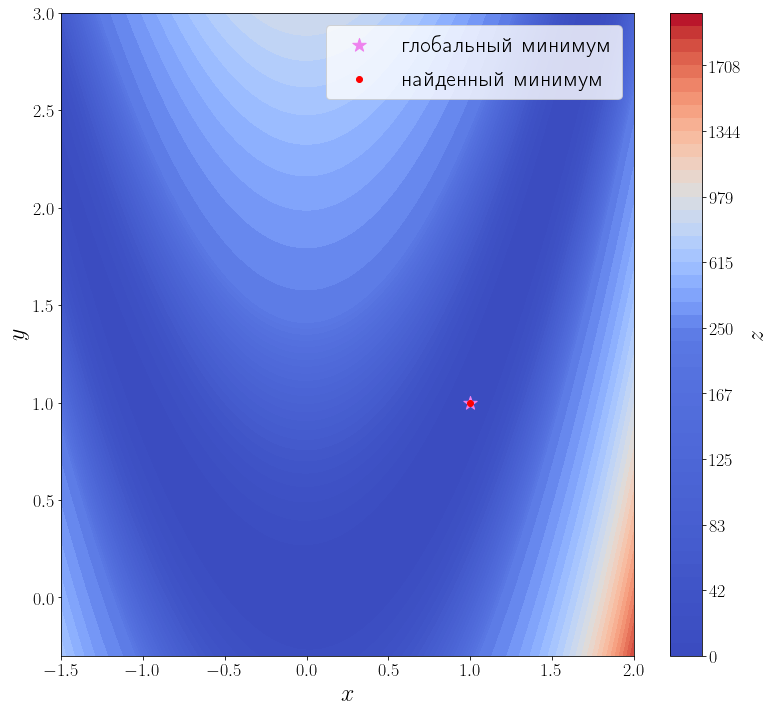

In [39]:
solution = optimize.minimize(f, x0=[3, 0])
print(solution)

ax = plot_surface()
ax.scatter(solution.x[0], solution.x[1], color="red", label="найденный минимум")
ax.legend()

Из возвращаемого значения видно, что метод успешно сошелся и алгоритму потребовалось 42 итерации и 168 вызовов функции `f`, чтобы сойтись. 

### Известна первая производная

Передадим этому методу функцию, вычисляющую матрицу градиент искомой функции. Для этого необходимо использовать параметр `jac` этой функции.

      fun: 1.0497719786985556e-20
 hess_inv: array([[0.49999817, 1.00001013],
       [1.00001013, 2.00505181]])
      jac: array([-2.72340728e-09,  1.43485224e-09])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 42
     njev: 54
   status: 0
  success: True
        x: array([1., 1.])


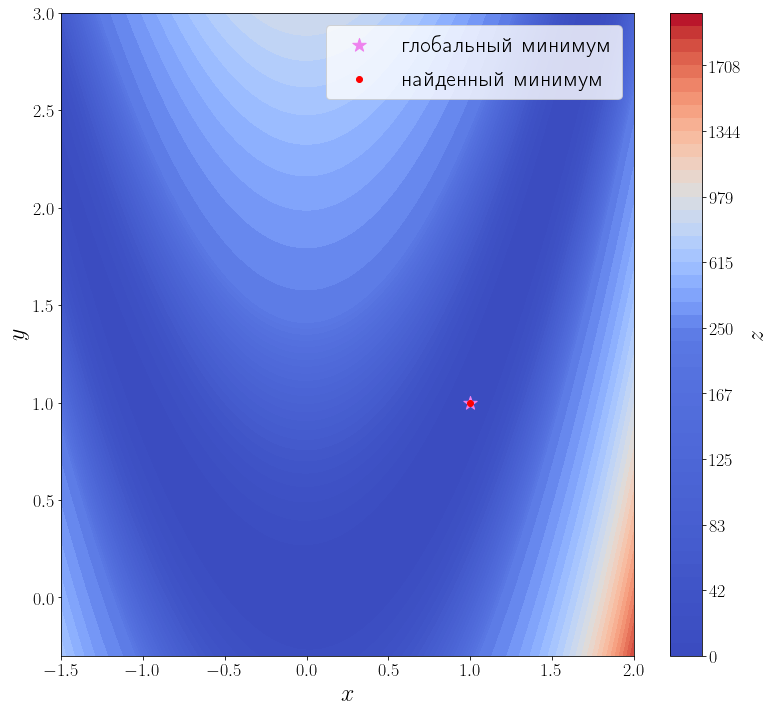

In [40]:
jacobian = optimize.rosen_der

solution = optimize.minimize(f, x0=[3, 0], jac=jacobian)
print(solution)

ax = plot_surface()
ax.scatter(solution.x[0], solution.x[1], color="red", label="найденный минимум")
ax.legend()

Количество итераций осталось прежним, а количество вызовов функции `f` снизилось до 35. Это достигается за счет того, что метод минимизации вычисляет производную, вызывая переданную функцию `jac`, а до этого он её оценивал численно, что требовало дополнительных вызовов `f`. 

### Известны первая и вторая производные

Передадим ещё информацию о второй производной функции `f`, т.е. матрицу Гессе. Метод минимизации по умолчанию (`BFGS`) --- метод первого порядка, чтобы задействовать матрицу Гессе, необходимо использовать метод второго порядка, например, `dogleg`.

     fun: 3.514212495812258e-16
    hess: array([[ 802.00002985, -400.00000744],
       [-400.00000744,  200.        ]])
     jac: array([ 1.31311361e-07, -4.70576911e-08])
 message: 'Optimization terminated successfully.'
    nfev: 18
    nhev: 14
     nit: 17
    njev: 15
  status: 0
 success: True
       x: array([1.00000002, 1.00000004])


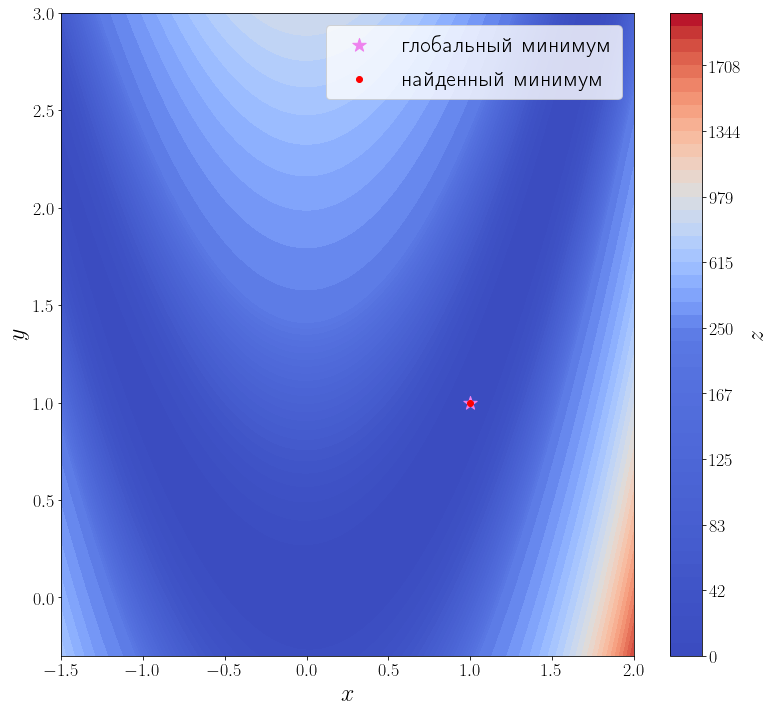

In [38]:
hessian = optimize.rosen_hess

solution = optimize.minimize(f, [3, 0], method="dogleg", jac=jacobian, hess=hessian)
print(solution)

ax = plot_surface()
ax.scatter(solution.x[0], solution.x[1], color="red", label="найденный минимум")
ax.legend()

Методу второго порядка потребовалось всего 17 итераций и 18 вызовов функции `f`, чтобы сойтись.

